<a href="https://colab.research.google.com/github/terryljh/aviation2/blob/main/asrs%20data%20cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# @title
#collect all csvs in one list to read them all into one dataframe
csv_urls = [
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/jan2005-jun2005.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/jul2005-mar2006.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/april2006-november2006.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2006-august2007.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2007-may2008.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2008-february2009.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/march2009-november2009.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2009-august2010.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2010-may2011.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2011-february2012.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/march2012-november2012.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2012-august2013.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2013-may2014.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2014-april2015.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2015-january2016.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/february2016-december2016.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/january2017-november2017.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2017-october2018.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/november2018-july2019.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/august2019-may2020.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2020-april2021.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2021-apr2022.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2022-mar2023.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/apr2023-mar2024.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/apr2024-dec2025.csv']


In [ ]:
#this code usually takes about 15-30 seconds to read in all csv's
df = pd.concat([pd.read_csv(url) for url in csv_urls], ignore_index=True)
pd.set_option('display.max_columns', None)

In [ ]:
new_headers = df.iloc[0] #dataset has headers, then the first row is the actual headings,
#so we want to replace headers with the first row new_headers

#removes anomolous dates that are in by mistake, should only be April 2024-May 2025

# Make the headers unique, in case some are repeated, function relabels 2,3 etc
#The ASRS occasionally has multiple reports for a single incident
#If we want to include second,third reports in our data, we need to include the
#second version of those columns too, but for simplicity maybe we only take the
#first report of each incident for now?
def make_unique(headers):
    counts = {}
    unique_headers = []
    for col in headers:
        if col in counts:
            counts[col] += 1
            unique_headers.append(f"{col}_{counts[col]}")
        else:
            counts[col] = 0
            unique_headers.append(col)
    return unique_headers
unique_headers = make_unique(new_headers)

df.columns = unique_headers
df = df.iloc[1:].reset_index(drop=True) #remove unnecessary first row
df

,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authorizations (UAS),Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory_1,Aircraft Operator_1,Make Model Name_1,Aircraft Zone_1,Crew Size_1,Operating Under FAR Part_1,Flight Plan_1,Mission_1,Nav In Use_1,Flight Phase_1,Route In Use_1,Airspace_1,Maintenance Status.Maintenance Deferred_1,Maintenance Status.Records Complete_1,Maintenance Status.Released For Service_1,Maintenance Status.Required / Correct Doc On Board_1,Maintenance Status.Maintenance Type_1,Maintenance Status.Maintenance Items Involved_1,Cabin Lighting_1,Number Of Seats.Number_1,Passengers On Board.Number_1,Crew Size Flight Attendant.Number Of Crew_1,Airspace Authorization Provider (UAS)_1,Operating Under Waivers / Exemptions / Authorizations (UAS)_1,Waivers / Exemptions / Authorizations (UAS)_1,Airworthiness Certification (UAS)_1,Weight Category (UAS)_1,Configuration (UAS)_1,Flight Operated As (UAS)_1,Flight Operated with Visual Observer (UAS)_1,Control Mode (UAS)_1,Flying In / Near / Over (UAS)_1,Passenger Capable (UAS)_1,Type (UAS)_1,Number of UAS Being Controlled (UAS)_1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person_1,Location In Aircraft_1,Reporter Organization_1,Function_1,Qualification_1,Experience_1,Cabin Activity_1,Human Factors_1,Communication Breakdown_1,UAS Communication Breakdown_1,ASRS Report Number.Accession Number_1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative_1,Callback_1,Synopsis,NaN
0,641722,200501,1801-2400,ZZZ.Airport,US,NaN,NaN,0,NaN,NaN,VMC,Fog; 5,NaN,Night,900,NaN,Tower ZZZ.Tower,Air Carrier,Regional Jet 200 ER/LR (CRJ200),NaN,2,Part 121,IFR,Passenger,NaN,Takeoff / Launch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nosewheel Steering,NaN,X,Malfunctioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aircraft X,NaN,Air Carrier,Pilot Not Flying; Captain,NaN,Flight Crew Last 90 Days 240; Flight Crew Tota...,NaN,NaN,NaN,NaN,641722,Aircraft X,NaN,Air Carrier,Pilot Flying; First Officer,NaN,Flight Crew Last 90 Days 120; Flight Crew Tota...,NaN,NaN,NaN,NaN,641721,Aircraft Equipment Problem Critical,NaN,NaN,Automation Aircraft Other Automation; Person F...,NaN,Flight Crew Diverted; Flight Crew Overcame Equ...,Aircraft; Human Factors,Aircraft,DURING TAXI TO RWY FOR TKOF; NOTHING UNUSUAL O...,NaN,NaN,NaN,A CL65 ON TKOF CLB AT 2000 FT DIVERTED DUE TO ...,NaN
1,641728,200501,0001-0600

In [ ]:
dfsubset = df[['Date', 'Locale Reference', 'State Reference', 'Operating Under FAR Part','Mission','Light', 'Flight Phase','Function', 'Contributing Factors / Situations', 'Primary Problem']]

In [ ]:
dfsubset=dfsubset.copy()
dfsubset['Date']= dfsubset['Date'].values
dfsubset['Date'] = pd.to_numeric(dfsubset['Date'], errors='coerce')
#the date column is of type string, we change to integer so we can manipulate it
#errors='coerce' will return NaN if not a number
#dfsubset['Year'] = dfsubset['Date']//100
dfsubset = dfsubset[(dfsubset['Date']//100 >= 2004) & (dfsubset['Date']//100 <= 2026)]
# there are accidentally some lines where the year is 0 BC, so we remove them
dfsubsetapril = dfsubset[dfsubset['Date']%100==4]
april_counts = dfsubsetapril.groupby(dfsubset['Date']//100).size().reset_index(name='Accident_Count')
dfsubset

,Date,Locale Reference,State Reference,Operating Under FAR Part,Mission,Light,Flight Phase,Function,Contributing Factors / Situations,Primary Problem
0,200501.0,ZZZ.Airport,US,Part 121,Passenger,Night,Takeoff / Launch,Pilot Not Flying; Captain,Aircraft; Human Factors,Aircraft
1,200501.0,ZZZ.Airport,US,Part 121,Passenger,Night,Initial Approach,Dispatcher,Environment - Non Weather Related; Company Pol...,Aircraft
2,200501.0,SFO.Airport,CA,Part 121,Passenger,Night,Taxi,Ground,Airport,Airport
3,200501.0,PHD.Airport,OH,Part 91,Personal,Daylight,Cruise,Single Pilot; Pilot Flying,Human Factors; Airspace Structure,NaN
4,200501.0,ZZZ.Airport,US,Part 121,Passenger,NaN,Descent,Pilot Flying; Captain,Aircraft,Aircraft
...,...,...,...,...,...,...,...,...,...,...
106586,202503.0,CAE.Airport,SC,NaN,NaN,Night,Taxi,First Officer,Airport; Human Factors,Airport
106587,202503.0,IAH.Airport,TX,Part 121,Passenger,NaN,Final Approach,Captain; Pilot Not Flying,Human Factors,Human Factors
106588,202503.0,NaN,NaN,Part 121,NaN,NaN,Parked,Technician,Aircraft; Manuals; Procedure,Aircraft
106589,202503.0,ZZZ.Airport,US,Part 121,Passenger,NaN,Climb,Captain; Pilot Flying,Aircraft; Human Factors,Aircraft


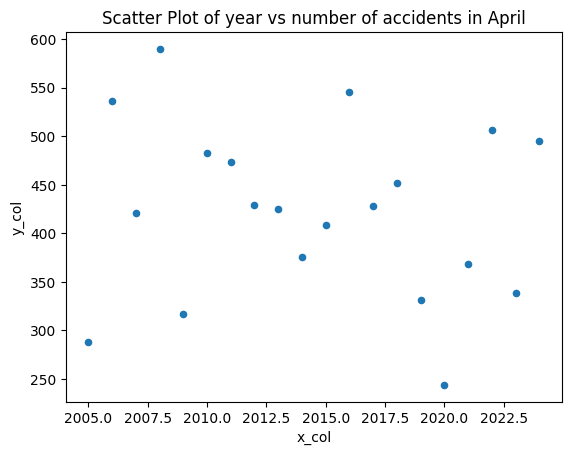

In [ ]:
april_counts.plot.scatter(x='Date', y='Accident_Count')
plt.title('Scatter Plot of year vs number of accidents in April')
plt.xlabel('x_col')
plt.ylabel('y_col')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
slr_model = LinearRegression()
slr_model.fit(april_counts[['Date']],april_counts['Accident_Count'])
slr_model.predict(april_counts[['Date']])
dfsubset

,Date,Locale Reference,State Reference,Operating Under FAR Part,Mission,Light,Flight Phase,Function,Contributing Factors / Situations,Primary Problem
0,200501.0,ZZZ.Airport,US,Part 121,Passenger,Night,Takeoff / Launch,Pilot Not Flying; Captain,Aircraft; Human Factors,Aircraft
1,200501.0,ZZZ.Airport,US,Part 121,Passenger,Night,Initial Approach,Dispatcher,Environment - Non Weather Related; Company Pol...,Aircraft
2,200501.0,SFO.Airport,CA,Part 121,Passenger,Night,Taxi,Ground,Airport,Airport
3,200501.0,PHD.Airport,OH,Part 91,Personal,Daylight,Cruise,Single Pilot; Pilot Flying,Human Factors; Airspace Structure,NaN
4,200501.0,ZZZ.Airport,US,Part 121,Passenger,NaN,Descent,Pilot Flying; Captain,Aircraft,Aircraft
...,...,...,...,...,...,...,...,...,...,...
106586,202503.0,CAE.Airport,SC,NaN,NaN,Night,Taxi,First Officer,Airport; Human Factors,Airport
106587,202503.0,IAH.Airport,TX,Part 121,Passenger,NaN,Final Approach,Captain; Pilot Not Flying,Human Factors,Human Factors
106588,202503.0,NaN,NaN,Part 121,NaN,NaN,Parked,Technician,Aircraft; Manuals; Procedure,Aircraft
106589,202503.0,ZZZ.Airport,US,Part 121,Passenger,NaN,Climb,Captain; Pilot Flying,Aircraft; Human Factors,Aircraft


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


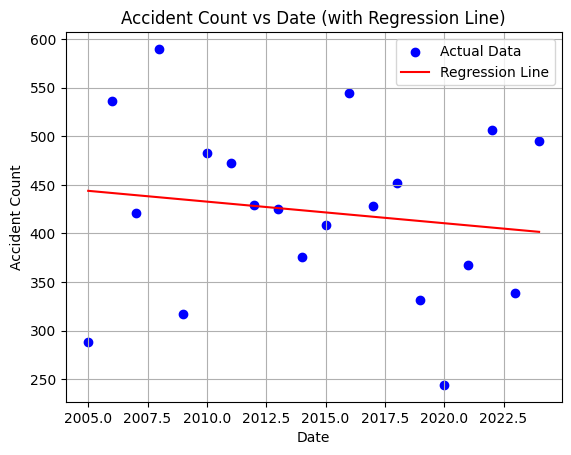

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = april_counts[['Date']]
y_true = april_counts['Accident_Count']

# Scatter plot of actual data
plt.scatter(X, y_true, color='blue', label='Actual Data')

# Create a smooth line of X values for the regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = slr_model.predict(X_line)

# Plot regression line
plt.plot(X_line, y_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Accident Count')
plt.title('Accident Count vs Date (with Regression Line)')
plt.legend()
plt.grid(True)
plt.show()


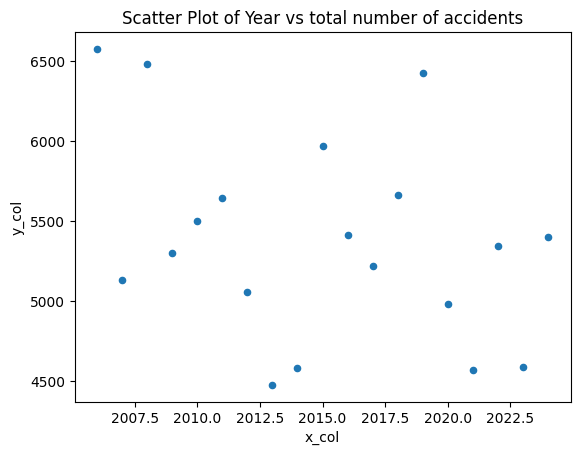

,Date,Accident_Count
0,2006.0,6576
1,2007.0,5134
2,2008.0,6479
3,2009.0,5301
4,2010.0,5503
5,2011.0,5646
6,2012.0,5056
7,2013.0,4478
8,2014.0,4580
9,2015.0,5972


In [ ]:
dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]
#for the yearly counts, we cannot include 2025, because the data is not complete
#for some reason 2025 has very few accidents compared to the others
yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.plot.scatter(x='Date', y='Accident_Count')
plt.title('Scatter Plot of Year vs total number of accidents')
plt.xlabel('x_col')
plt.ylabel('y_col')
plt.show()

from sklearn.linear_model import LinearRegression
slryearly = LinearRegression()
slryearly.fit(yearly_counts[['Date']],yearly_counts['Accident_Count'])
yearly_counts

In [ ]:
import statsmodels.api as sm

dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]

yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.rename(columns={yearly_counts.columns[0]: 'Year'}, inplace=True)

X = sm.add_constant(yearly_counts['Year'])
y = yearly_counts['Accident_Count']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Accident_Count   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.376
Date:                Wed, 04 Jun 2025   Prob (F-statistic):              0.142
Time:                        04:46:04   Log-Likelihood:                -147.94
No. Observations:                  19   AIC:                             299.9
Df Residuals:                      17   BIC:                             301.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.549e+04    5.2e+04      1.645      0.1

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
import statsmodels.api as sm

dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]

monthly_counts = dfsubset2.groupby(dfsubset2['Date']%100).size().reset_index(name='Accident_Count_Per_Month')
monthly_counts.rename(columns={monthly_counts.columns[0]: 'Month'}, inplace=True)

X = sm.add_constant(monthly_counts['Month'])
y = monthly_counts['Accident_Count_Per_Month']

model = sm.OLS(y, X).fit()

print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Accident_Count_Per_Month   R-squared:                       0.136
Model:                                  OLS   Adj. R-squared:                  0.050
Method:                       Least Squares   F-statistic:                     1.575
Date:                      Wed, 04 Jun 2025   Prob (F-statistic):              0.238
Time:                              04:48:03   Log-Likelihood:                -91.609
No. Observations:                        12   AIC:                             187.2
Df Residuals:                            10   BIC:                             188.2
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


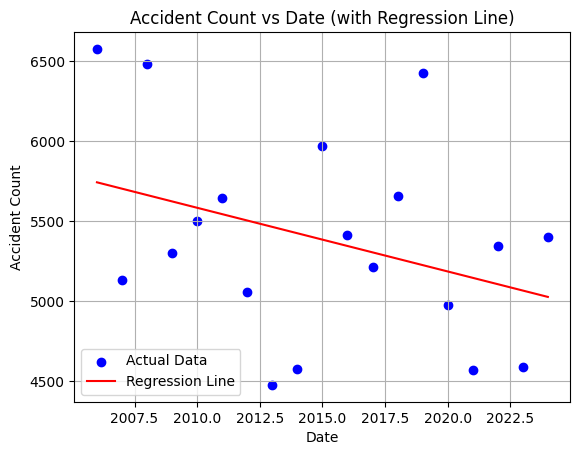

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = yearly_counts[['Date']]
y_true = yearly_counts['Accident_Count']

# Scatter plot of actual data
plt.scatter(X, y_true, color='blue', label='Actual Data')

# Create a smooth line of X values for the regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = slryearly.predict(X_line)

# Plot regression line
plt.plot(X_line, y_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Accident Count')
plt.title('Accident Count vs Date (with Regression Line)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = slryearly.predict(yearly_counts[['Date']])
r2_score(y_true, y_pred)


0.12261858731268938

In [ ]:
#the r2_score is bad, so we add months and other things as categorical variables
#dfsubset2.groupby(dfsubset['Date']).size().reset_index(name='Accident_Count')
import statsmodels.api as sm

dfsubset2=dfsubset2.copy()
dfsubset2['Year'] = dfsubset2['Date']//100
dfsubset2['Month'] = dfsubset2['Date']%100
grouped = dfsubset2.groupby(['Year', 'Month']).size().reset_index(name='count')
month_dummies = pd.get_dummies(grouped['Month'], prefix='Month', drop_first=True)
X = pd.concat([grouped[['Year']], month_dummies], axis=1)
#y_true = dfsubset2.groupby(dfsubset2['Year','Month'].size().reset_index(name='Accident_Count'))
y_true = grouped['count']
#grouped
monthmodel = LinearRegression()
monthmodel.fit(X,y_true)

r2=r2_score(y_true, monthmodel.predict(X))

# Calculate Adjusted R^2
n = X.shape[0]  # number of samples
p = X.shape[1]  # number of predictors (features)

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R^2: {r2:.4f}")
print(f"Adjusted R^2: {adjusted_r2:.4f}")




R^2: 0.1495
Adjusted R^2: 0.1020


In [ ]:
#the r2_score is bad, so we add months and other things as categorical variables
#dfsubset2.groupby(dfsubset['Date']).size().reset_index(name='Accident_Count')
import statsmodels.api as sm

dfsubset2=dfsubset2.copy()
dfsubset2['Year'] = dfsubset2['Date']//100
dfsubset2['Month'] = dfsubset2['Date']%100
grouped = dfsubset2.groupby(['Year', 'Month']).size().reset_index(name='count')
month_dummies = pd.get_dummies(grouped['Month'], prefix='Month', drop_first=True)

# Explicitly convert columns to numeric types before concatenation
grouped['Year'] = pd.to_numeric(grouped['Year'], errors='coerce')
month_dummies = month_dummies.astype(float) # Ensure dummy columns are float

X = pd.concat([grouped[['Year']], month_dummies], axis=1)

# Drop rows with NaN that might have been introduced by coercion
X = X.dropna()
y_true = grouped.loc[X.index, 'count'] # Align y_true with the cleaned X

#y_true = dfsubset2.groupby(dfsubset2['Year','Month'].size().reset_index(name='Accident_Count'))
#y_true = grouped['count'] # This y_true might still contain NaNs if X was dropped
#grouped
#monthmodel = LinearRegression()
#monthmodel.fit(X,y_true)

# Add a constant term to the predictor variables for the intercept
X = sm.add_constant(X, prepend=False)

monthmodel2 = sm.OLS(y_true, X).fit()
monthmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.149
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           0.000375
Time:                        04:16:48   Log-Likelihood:                -1323.3
No. Observations:                 228   AIC:                             2673.
Df Residuals:                     215   BIC:                             2717.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year          -3.3129      0.999     -3.316      0.001      -5.282      -1.343
Month_2.0    -30.1579     26.811     -1.125      0.262     -83.004      22.688
Month_3.0     11.0526     26.811      0.412      0.681     -41.793      63.898
Month_4.0      2.8421     26.811      0.106      0.916     -50.004      55.688
Month_5.0     25.1579     26.811      0.938      0.349     -27.688      78.004
Month_6.0     45.3684     26.811      1.692      0.092      -7.477      98.214
Month_7.0     86.8947     26.811      3.241      0.001      34.049     139.741
Month_8.0     47.0000     26.811      1.753      0.081      -5.846      99.846
Month_9.0      8.9474     26.811      0.334      0.739     -43.898      61.793
Month_10.0    37.1053     26.811      1.384      0.168     -15.741      89.951
Month_11.0    11.8947     26.811      0.444      0.658     -40.951      64.741
Month_12.0    15.2105     26.811      0.567      0.571     -37.635      68.056
const       7102.4240   2013.442      3.528      0.001    3133.810    1.11e+04
==============================================================================
Omnibus:                        7.448   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.530
Skew:                           0.291   Prob(JB):                       0.0141
Kurtosis:                       3.747   Cond. No.                     7.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# @title
#this block of code just tests some data cleaning on a smaller subset
df = pd.read_csv('https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/apr2024-dec2025.csv')
df = df.drop(df.columns[0], axis=1)
df = df.reset_index(drop=True)

#testing change to see if edits on collab can be passed to github

#The column headings are not descriptive, and more descriptive column headings are in the zeroth row,
# so we replace the column headings with the entries of the zeroth row, and remove the zeroth row.
new_headers = df.iloc[0]

# Make the headers unique, in case some are repeated, we need to relabel 2,3 etc
def make_unique(headers):
    counts = {}
    unique_headers = []
    for col in headers:
        if col in counts:
            counts[col] += 1
            unique_headers.append(f"{col}_{counts[col]}")
        else:
            counts[col] = 0
            unique_headers.append(col)
    return unique_headers
unique_headers = make_unique(new_headers)

df.columns = unique_headers
df = df.iloc[1:].reset_index(drop=True) #remove unnecessary first row

df['Date']= df['Date'].values
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')
#the date column is of type string, we change to integer so we can manipulate it
#errors='coerce' will remove NaN

def months_since_jan_2024(yyyymm):
    year = yyyymm // 100
    month = yyyymm % 100
    # Calculate months since 2024-01
    return (year - 2024) * 12 + (month - 1)
df['Date'] = df['Date'].apply(months_since_jan_2024) #change date yyyymm to months since Jan 2024
df = df[(df['Date'] >= 3) & (df['Date'] <= 24)] #removes anomolous dates that are in by mistake, should only be April 2024-May 2025

vc_df = df['Date'].value_counts().reset_index()
vc_df = vc_df.sort_values('Date')
vc_df.columns = ['Months after January 2024', 'Number of accidents in month']
vc_df
df

,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authorizations (UAS),Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory_1,Aircraft Operator_1,Make Model Name_1,Aircraft Zone_1,Crew Size_1,Operating Under FAR Part_1,Flight Plan_1,Mission_1,Nav In Use_1,Flight Phase_1,Route In Use_1,Airspace_1,Maintenance Status.Maintenance Deferred_1,Maintenance Status.Records Complete_1,Maintenance Status.Released For Service_1,Maintenance Status.Required / Correct Doc On Board_1,Maintenance Status.Maintenance Type_1,Maintenance Status.Maintenance Items Involved_1,Cabin Lighting_1,Number Of Seats.Number_1,Passengers On Board.Number_1,Crew Size Flight Attendant.Number Of Crew_1,Airspace Authorization Provider (UAS)_1,Operating Under Waivers / Exemptions / Authorizations (UAS)_1,Waivers / Exemptions / Authorizations (UAS)_1,Airworthiness Certification (UAS)_1,Weight Category (UAS)_1,Configuration (UAS)_1,Flight Operated As (UAS)_1,Flight Operated with Visual Observer (UAS)_1,Control Mode (UAS)_1,Flying In / Near / Over (UAS)_1,Passenger Capable (UAS)_1,Type (UAS)_1,Number of UAS Being Controlled (UAS)_1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person_1,Location In Aircraft_1,Reporter Organization_1,Function_1,Qualification_1,Experience_1,Cabin Activity_1,Human Factors_1,Communication Breakdown_1,UAS Communication Breakdown_1,ASRS Report Number.Accession Number_1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative_1,Callback_1,Synopsis,NaN
1,3,1801-2400,ZZZ.ARTCC,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center ZZZ,Air Carrier,B787 Dreamliner Undifferentiated or Other Model,NaN,3,Part 121,IFR,Passenger,NaN,Cruise,Direct,Class A ZZZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cockpit Window,NaN,X,Malfunctioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aircraft X,Flight Deck,Air Carrier,Pilot Not Flying; First Officer,Flight Crew Air Transport Pilot (ATP); Flight ...,Flight Crew Last 90 Days 20.08; Flight Crew To...,NaN,Troubleshooting,NaN,NaN,2102210,Aircraft X,Flight Deck,Air Carrier,Pilot Flying; First Officer,Flight Crew Air Transport Pilot (ATP); Flight ...,Flight Crew Last 90 Days 45.53; Flight Crew To...,NaN,Troubleshooting,NaN,NaN,2102224,Aircraft Equipment Problem Critical,NaN,NaN,Person Flight Crew,In-flight,Air Traffic Control Issued New Clearance; Flig...,Aircraft,Aircraft,At the lower base of windshield; small electri...,NaN,

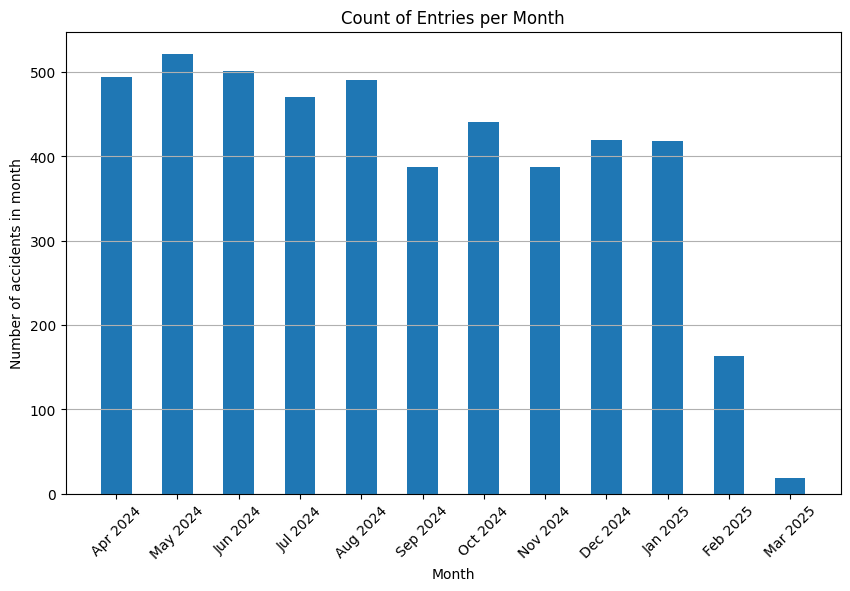

In [ ]:
# @title
vc_df['Month_Label'] = vc_df['Months after January 2024'].apply(
    lambda x: pd.to_datetime('2024-01-01') + pd.DateOffset(months=x)
).dt.strftime('%b %Y')
#convert months after Jan 2024 back to actual month for plotting


plt.figure(figsize=(10,6))
plt.bar(vc_df['Month_Label'], vc_df['Number of accidents in month'], width=0.5)
plt.xlabel('Month')
plt.ylabel('Number of accidents in month')
plt.title('Count of Entries per Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()